# Importing The REquired Libraries 

In [3]:
#Importing The REquired Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Lambda,Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import RMSprop,Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import image
import os
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau

# loading dataset

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print(train['target'].value_counts())

mohiniyattam     50
odissi           49
bharatanatyam    47
kathakali        47
kuchipudi        46
sattriya         45
kathak           44
manipuri         36
Name: target, dtype: int64


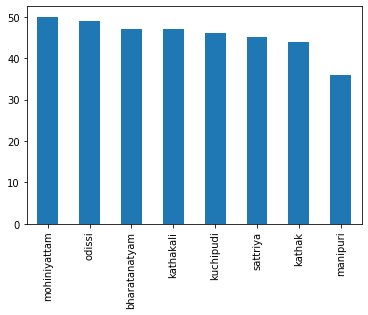

In [5]:
#Histogram chart for target
train['target'].value_counts().plot(kind='bar')

# creating working directory

In [6]:
base='dataset'
train_dir=os.path.join(str(base)+'/train/')
test_dir=os.path.join(str(base)+'/test/')

In [7]:
train_fnames=os.listdir(train_dir)
test_fnames=os.listdir(test_dir)

In [8]:
print(train_fnames[:9])
print(test_fnames[:9])

['1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg']
['108.jpg', '11.jpg', '110.jpg', '112.jpg', '114.jpg', '119.jpg', '125.jpg', '128.jpg', '129.jpg']


# Reading and resizing the images

In [9]:
img_width=224
img_height=224

In [10]:
def train_data_preparation(list_of_images,train,train_dir):
    x=[]#Array of images
    y=[]# labels
    for image in list_of_images:
        x.append(cv2.resize(cv2.imread(train_dir+image),(img_width,img_height),interpolation=cv2.INTER_CUBIC))
        if image in list(train['Image']):
            y.append(train.loc[train['Image']==image,'target'].values[0])
    return x,y

In [11]:
import cv2
training_data,training_labels=train_data_preparation(train_fnames,train,train_dir)

In [12]:
def test_prepare_data(list_of_images,test_dir):
    x=[]
    for image in list_of_images:
        
        x.append(cv2.resize(cv2.imread(test_dir+image),(224,224),interpolation=cv2.INTER_CUBIC))
    return x    

In [13]:
testing_data=test_prepare_data(test_fnames,test_dir)

# First 30 images

In [14]:
def show_batch(image_batch,image_label):
    plt.figure(figsize=(12,12))
    for n in range(30):
        ax=plt.subplot(6,6,n+1)
        plt.imshow(image_batch[n])
        plt.title(image_label[n].title())
        plt.axis('off')

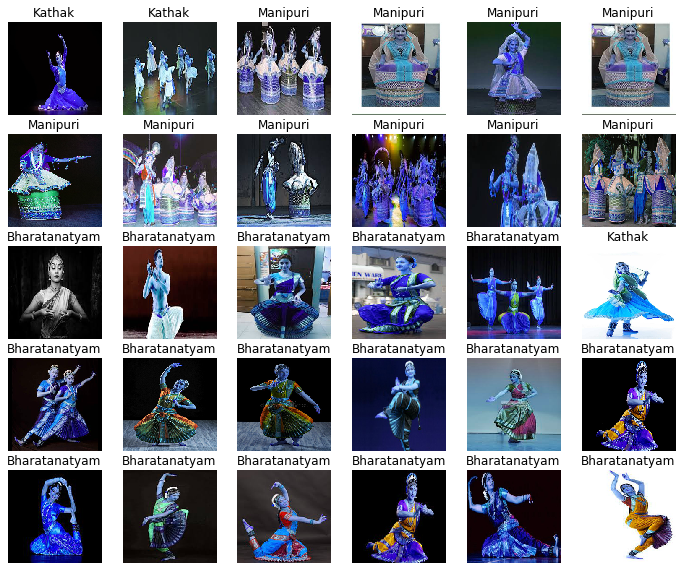

In [15]:
show_batch(training_data,training_labels)

# pre-processing

In [16]:
le=LabelEncoder()
training_labels=le.fit_transform(training_labels)

In [17]:
training_labels

array([1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5,
       5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5,
       5, 5, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 7, 7, 7, 7,
       1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 6,
       6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

# Data augmentation

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(training_data,training_labels,test_size=0.33,random_state=42)

In [19]:
#Data Augmentation
train_datagenerator=ImageDataGenerator(rescale=1./255,
                                      featurewise_center=False,
                                      samplewise_center=False,
                                      rotation_range=40,
                                      zoom_range=0.20,
                                      width_shift_range=0.10,
                                       height_shift_range=0.10,
                                       horizontal_flip=True,
                                       vertical_flip=False)

test_datagenerator=ImageDataGenerator(rescale=1./255)


train_datagenerator.fit(X_train)
test_datagenerator.fit(X_test)
test_datagenerator.fit(testing_data)

X_train=np.array(X_train)
testing_data=np.array(testing_data)
X_test=np.array(X_test)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(243, 224, 224, 3)
(121, 224, 224, 3)
(243,)
(121,)


# Applying VGG16

In [21]:
#Training Using Transfer Learning
vggmodel=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3),pooling='max')

In [22]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# Initializing and adding layers

In [23]:
vggmodel.trainable=False
model=Sequential([
    vggmodel,
    Dense(units=1024,activation='relu',kernel_initializer='uniform'),
    Dropout(0.25),
    Dense(units=512,activation='relu'),
    Dropout(0.25),
    Dense(units=8,activation='softmax')
])


In [24]:
reduce_learning_rate=ReduceLROnPlateau(monitor='loss',
                                      factor=0.1,
                                      patience=2,
                                      cooldown=2,
                                      min_lr=0.01,
                                      verbose=1)
callbacks = [reduce_learning_rate]

# Compiling

In [25]:
from keras.preprocessing.image import ImageDataGenerator
model.compile( optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history =model.fit_generator(
    train_datagenerator.flow(X_train, to_categorical(y_train,8), batch_size=16),
    validation_data=test_datagenerator.flow(X_test, to_categorical(y_test,8), batch_size=16),
    verbose=2,
    epochs=5,
    callbacks=callbacks
)

Using TensorFlow backend.


Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 16 steps, validate for 8 steps
Epoch 1/5
16/16 - 68s - loss: 2.5364 - accuracy: 0.1646 - val_loss: 1.9165 - val_accuracy: 0.3884
Epoch 2/5
16/16 - 69s - loss: 1.9511 - accuracy: 0.2798 - val_loss: 1.7043 - val_accuracy: 0.3388
Epoch 3/5
16/16 - 76s - loss: 1.7354 - accuracy: 0.3333 - val_loss: 1.5079 - val_accuracy: 0.5124
Epoch 4/5
16/16 - 69s - loss: 1.5122 - accuracy: 0.4486 - val_loss: 1.3355 - val_accuracy: 0.5289
Epoch 5/5
16/16 - 69s - loss: 1.4094 - accuracy: 0.4691 - val_loss: 1.3097 - val_accuracy: 0.5537


In [26]:
#Visualization

Text(0.5, 1.0, 'Training and validation loss')

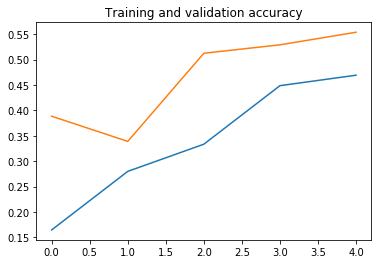

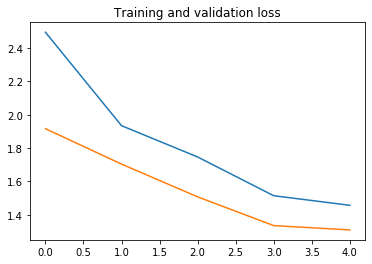

In [27]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc      = history.history[ 'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot( epochs, acc )
plt.plot( epochs, val_acc )
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )